# Research on car sales ads

This is an analysis for Crankshaft List. Hundreds of free advertisements for vehicles are published on the site every day.

We will study data collected over the last few years and determine which factors influence the asking price of a vehicle. 

## Outline of analysis

- Assesment of data, treatment of missing values and reassignment of datatypes

- Outlier removal

- Visualization of correlations between asking price and other factors

- Description of analysis results and conclusions

## Description of the data
The dataset contains the following fields:

`price`

`model_year`

`model`

`condition`

`cylinders`

`fuel` — gas, diesel, etc.

`odometer` — the vehicle's mileage when the ad was published

`transmission`

`paint_color`

`is_4wd` — whether the vehicle has 4-wheel drive (Boolean type)

`date_posted` — the date the ad was published

`days_listed` — from publication to removal

## General information. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
raw = pd.read_csv('/datasets/vehicles_us.csv', parse_dates=['date_posted'])
df = raw.copy()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null int64
model_year      47906 non-null float64
model           51525 non-null object
condition       51525 non-null object
cylinders       46265 non-null float64
fuel            51525 non-null object
odometer        43633 non-null float64
transmission    51525 non-null object
type            51525 non-null object
paint_color     42258 non-null object
is_4wd          25572 non-null float64
date_posted     51525 non-null datetime64[ns]
days_listed     51525 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 5.1+ MB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,51525.0,12132.464920,10040.803015,1.0,5000.0,9000.0,16839.0,375000.0
model_year,47906.0,2009.750470,6.282065,1908.0,2006.0,2011.0,2014.0,2019.0
cylinders,46265.0,6.125235,1.660360,3.0,4.0,6.0,8.0,12.0
odometer,43633.0,115553.461738,65094.611341,0.0,70000.0,113000.0,155000.0,990000.0
is_4wd,25572.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
days_listed,51525.0,39.554760,28.204270,0.0,19.0,33.0,53.0,271.0


In [5]:
df.describe(include=np.object).T

,count,unique,top,freq
model,51525,100,ford f-150,2796
condition,51525,6,excellent,24773
fuel,51525,5,gas,47288
transmission,51525,3,automatic,46902
type,51525,13,SUV,12405
paint_color,42258,12,white,10029


In [6]:
df.sample(10, random_state=123)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
24313,4500,2000.0,chevrolet silverado 2500hd,good,8.0,gas,283300.0,automatic,truck,white,1.0,2019-02-15,50
31817,8200,2013.0,subaru impreza,excellent,NaN,gas,43500.0,automatic,sedan,NaN,1.0,2019-02-18,43
50483,5750,2011.0,kia soul,good,4.0,gas,116040.0,manual,wagon,white,NaN,2018-08-29,24
32299,5200,2008.0,honda civic,excellent,NaN,gas,NaN,automatic,sedan,red,NaN,2019-04-03,13
18346,41800,2018.0,chevrolet silverado 3500hd,good,8.0,gas,NaN,automatic,truck,black,1.0,2018-10-13,82
28939,26000,1970.0,chevrolet malibu,excellent,8.0,gas,NaN,automatic,coupe,red,NaN,2018-12-02,47
19821,3495,2008.0,nissan sentra,good,4.0,gas,143418.0,automatic,sedan,white,NaN,2018-05-11,12
41064,2200,2000.0,ford ranger,good,6.0,gas,112701.0,manual,pickup,white,NaN,2018-11-20,3
38749,8447,2010.0,chevrolet tahoe,good,8.0,gas,NaN,automatic,SUV,NaN,1.0,2018-07-24,4
10396,7995,2013.0,honda civic,like new,NaN,gas,74000.0,automatic,coupe,white,NaN,2018-08-15,30


### Conclusion

There are missing values in `model_year`, `cylinders`, `odometer`, `paint_color` and `is_4wd`, as well as incorrect data types for `model_year`, `cylinders`, `odometer` and `is_4wd`. We have to address that before analysis.

## Data preprocessing

Let's have a look at the categorical values.

In [7]:
for column in ['model', 'condition', 'fuel', 'transmission', 'type', 'paint_color']:
    print(sorted(df[column].fillna('').unique()))
    print()

['acura tl', 'bmw x5', 'buick enclave', 'cadillac escalade', 'chevrolet camaro', 'chevrolet camaro lt coupe 2d', 'chevrolet colorado', 'chevrolet corvette', 'chevrolet cruze', 'chevrolet equinox', 'chevrolet impala', 'chevrolet malibu', 'chevrolet silverado', 'chevrolet silverado 1500', 'chevrolet silverado 1500 crew', 'chevrolet silverado 2500hd', 'chevrolet silverado 3500hd', 'chevrolet suburban', 'chevrolet tahoe', 'chevrolet trailblazer', 'chevrolet traverse', 'chrysler 200', 'chrysler 300', 'chrysler town & country', 'dodge charger', 'dodge dakota', 'dodge grand caravan', 'ford econoline', 'ford edge', 'ford escape', 'ford expedition', 'ford explorer', 'ford f-150', 'ford f-250', 'ford f-250 sd', 'ford f-250 super duty', 'ford f-350 sd', 'ford f150', 'ford f150 supercrew cab xlt', 'ford f250', 'ford f250 super duty', 'ford f350', 'ford f350 super duty', 'ford focus', 'ford focus se', 'ford fusion', 'ford fusion se', 'ford mustang', 'ford mustang gt coupe 2d', 'ford ranger', 'ford 

We have a lot of model names, but no duplicates or anything that require special treatment. We'll move on to the numeric values.

We have over 3500 missing values in `model_year`. Model year is one of the major factors that go into pricing, along with model, so if we know all the prices and models we can infer the model year. We do that by multi-index grouping and using the median to fill in the missing values. We could also including other factors in our grouping, but this way we will end up with fewer `NaN` being replaced, and possibly giving too much weight to outliers because the groups will be smaller. For grouping on prices to be effective, we first need to create a new column for prices rounded to the nearest 1000.

In [8]:
report_na = lambda series: f"NaN values: {series.isna().sum()} ({series.isna().mean():.2%})"

def raw_vs_df(column):
    print('Original', column)
    print(raw[column].describe())
    print()
    print(report_na(raw[column]))
    print()
    print('Current', column)
    print(df[column].describe())
    print()
    print(report_na(df[column]))

In [9]:
df['price_group'] = df['price'].round(-3)
df['model_year'] = df['model_year'].fillna(df
                                           .groupby(['price_group', 'model'])['model_year']
                                           .transform('median')
                                          )
raw_vs_df('model_year')

Original model_year
count    47906.000000
mean      2009.750470
std          6.282065
min       1908.000000
25%       2006.000000
50%       2011.000000
75%       2014.000000
max       2019.000000
Name: model_year, dtype: float64

NaN values: 3619 (7.02%)

Current model_year
count    51486.000000
mean      2009.752476
std          6.204590
min       1908.000000
25%       2006.000000
50%       2011.000000
75%       2014.000000
max       2019.000000
Name: model_year, dtype: float64

NaN values: 39 (0.08%)


The statistics of `model_year` bearly changed due to our treatment, which is good. On the other hand, 39 `NaN` values still remain. Since they account for less than a tenth of a single percent, we can safely discard them.

In [10]:
df.dropna(subset=['model_year'], inplace=True)
print(report_na(df['model_year']))

NaN values: 0 (0.00%)


Next up is `cylinders`, over 5000 of which are missing. This should be the same for all cars from the same model and year.

In [11]:
df['cylinders'] = df['cylinders'].fillna(df
                                         .groupby(['model_year', 'model'])['cylinders']
                                         .transform('median')
                                        )
raw_vs_df('cylinders')

Original cylinders
count    46265.000000
mean         6.125235
std          1.660360
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64

NaN values: 5260 (10.21%)

Current cylinders
count    51451.000000
mean         6.119628
std          1.657132
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64

NaN values: 35 (0.07%)


Once again, the stats stayed almost the same and the remaining `NaN` values make up an insignificant portion of the data, that we can safely discard.

In [12]:
df.dropna(subset=['cylinders'], inplace=True)
print(report_na(df['cylinders']))

NaN values: 0 (0.00%)


For `odometer` we'll take the same approach as with `model_year`.

In [13]:
df['odometer'] = raw['odometer'].fillna(df
                                         .groupby(['price_group', 'model', 'model_year'])['cylinders']
                                         .transform('median')
                                        )
raw_vs_df('odometer')

Original odometer
count     43633.000000
mean     115553.461738
std       65094.611341
min           0.000000
25%       70000.000000
50%      113000.000000
75%      155000.000000
max      990000.000000
Name: odometer, dtype: float64

NaN values: 7892 (15.32%)

Current odometer
count     51451.000000
mean      97878.394307
std       72911.203155
min           0.000000
25%       35931.000000
50%       99134.000000
75%      146552.000000
max      990000.000000
Name: odometer, dtype: float64

NaN values: 0 (0.00%)


This time, it looks like filling in the missing values shifted the overall stats toward lower values. At least we don't need to remove more rows.

As for `paint_color`, we can avoid the guesswork by replacing all `NaN` with `'unknown'`.

In [14]:
df['paint_color'].fillna('unknown', inplace=True)
raw_vs_df('paint_color')

Original paint_color
count     42258
unique       12
top       white
freq      10029
Name: paint_color, dtype: object

NaN values: 9267 (17.99%)

Current paint_color
count     51451
unique       13
top       white
freq      10016
Name: paint_color, dtype: object

NaN values: 0 (0.00%)


Next, we'll convert to the correct data types. `model_year`, `cylinders`, `odometer` are all integers mistakenly stored as `float`. `is_4wd` only has 1.0 or NaN values, and these probably mean true\false, respectively. On top of that, 64 bytes is more than necessary, and we'll resize all `int64` to an appropriate size.

In [15]:
for column in ['price', 'odometer', 'price_group']:
    df[column] = df[column].astype('int32')
    
for column in ['model_year', 'days_listed']:
    df[column] = df[column].astype('int16')
    
for column in ['cylinders']:
    df[column] = df[column].astype('int8')

df['is_4wd'] = df['is_4wd'].fillna(0).astype('bool')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51451 entries, 0 to 51524
Data columns (total 14 columns):
price           51451 non-null int32
model_year      51451 non-null int16
model           51451 non-null object
condition       51451 non-null object
cylinders       51451 non-null int8
fuel            51451 non-null object
odometer        51451 non-null int32
transmission    51451 non-null object
type            51451 non-null object
paint_color     51451 non-null object
is_4wd          51451 non-null bool
date_posted     51451 non-null datetime64[ns]
days_listed     51451 non-null int16
price_group     51451 non-null int32
dtypes: bool(1), datetime64[ns](1), int16(2), int32(3), int8(1), object(6)
memory usage: 6.5+ MB


We actually ended up with a heavier dataset, probably due to all the missing values we filled in.

## Make calculations and add them to the table

Now we'll add some new columns based on the existing ones, as well as convert `condition` from `str` into `int` so it's easier to work with.

In [16]:
df['weekday_posted'] = pd.DatetimeIndex(df['date_posted']).weekday
df['month_posted'] = pd.DatetimeIndex(df['date_posted']).month
df['year_posted'] = pd.DatetimeIndex(df['date_posted']).year
df['age_posted'] = df['year_posted'] - df['model_year'] + 1
df.loc[df['age_posted'] < 0, 'age_posted'] = 0
df['mean_mileage'] = df['odometer'].where(df['age_posted'] < 1, df['odometer'] / df['age_posted'])

for i, text in enumerate(['salvage', 'fair', 'good', 'excellent', 'like new', 'new']):
    df.loc[df['condition'] == text, 'condition'] = i

df.sample(10, random_state=456)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,price_group,weekday_posted,month_posted,year_posted,age_posted,mean_mileage
24640,3999,2002,dodge grand caravan,1,6,gas,140000,automatic,mini-van,silver,False,2018-06-29,60,4000,4,6,2018,17,8235.294118
40835,4250,2006,ford f-150,1,6,gas,148014,manual,pickup,white,False,2018-09-20,13,4000,3,9,2018,13,11385.692308
37917,28500,2009,chevrolet silverado,3,8,diesel,167702,automatic,truck,silver,True,2019-01-30,57,28000,2,1,2019,11,15245.636364
667,4950,2012,ford focus,3,4,gas,97000,automatic,sedan,silver,False,2018-08-03,30,5000,4,8,2018,7,13857.142857
33714,6500,1993,chevrolet corvette,3,8,gas,135000,automatic,coupe,unknown,False,2019-03-13,32,6000,2,3,2019,27,5000.000000
32911,16485,2011,gmc yukon,2,8,gas,127837,automatic,SUV,black,True,2019-02-16,59,16000,5,2,2019,9,14204.111111
44496,7950,2004,chevrolet silverado 1500,2,8,gas,173300,automatic,pickup,silver,True,2018-10-11,52,8000,3,10,2018,15,11553.333333
16398,12498,2010,nissan murano,3,6,gas,109456,automatic,SUV,unknown,True,2018-07-24,77,12000,1,7,2018,9,12161.777778
16675,6900,2010,gmc acadia,3,6,gas,76400,automatic,SUV,unknown,True,2018-08-11,119,7000,5,8,2018,9,8488.888889
35325,4650,2009,nissan versa,2,4,gas,93198,automatic,hatchback,unknown,False,2018-09-26,23,5000,2,9,2018,10,9319.800000


## Exploratory data analysis

### Numeric variable distributions

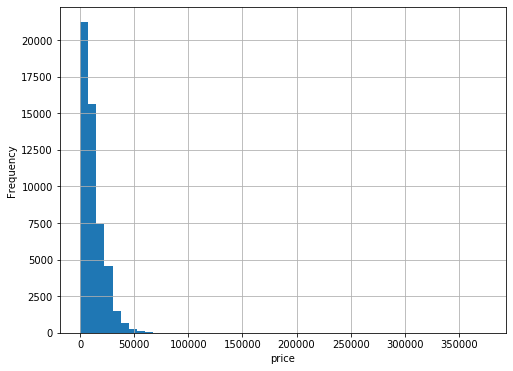

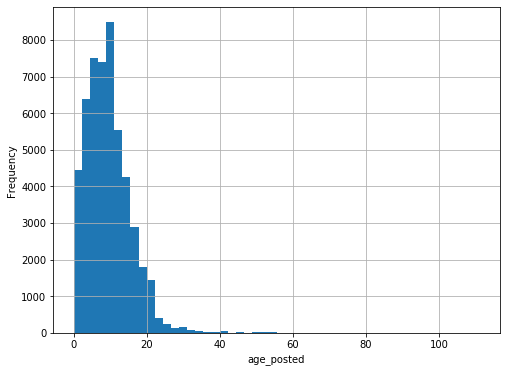

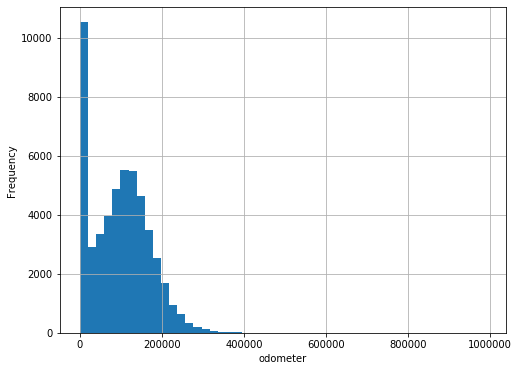

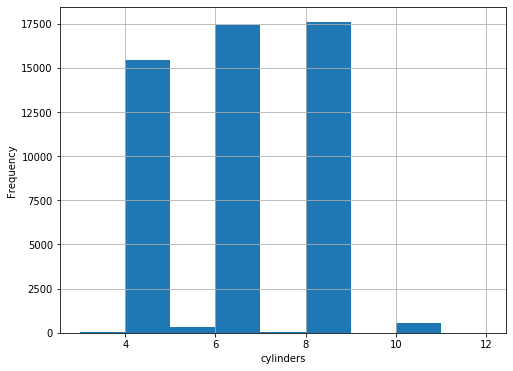

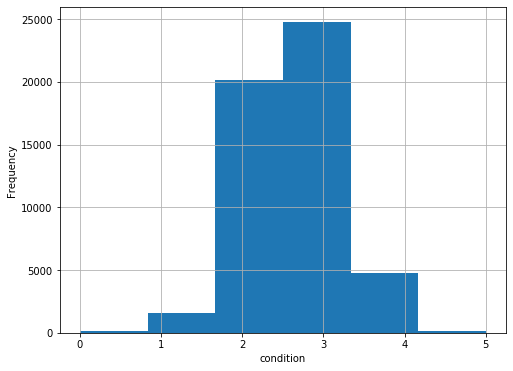

In [17]:
for column in ['price', 'age_posted', 'odometer', 'cylinders', 'condition']:
    plt.figure(figsize=(8, 6))
    plt.xlabel(column)
    plt.ylabel('Frequency')
    if column in ['cylinders', 'condition']:
        df[column].hist(bins=df[column].nunique())
    else:
        df[column].hist(bins=50)
    plt.show()

The first three, `price`, `age_posted`, and `odometer` are hard to read because of outliers. Let's see what they're like after removing the values over where the histogram flattens out (plus a safety margin).

In [18]:
outliers = df.query('price > 100000 or age_posted > 60 or odometer > 500000')
df2 = df.drop(outliers.index)
print(f'New dataset / old dataset: {len(df2)} / {len(df)} ({len(df2)/len(df):.2%})')

New dataset / old dataset: 51405 / 51451 (99.91%)


We didn't lose much data doing that.

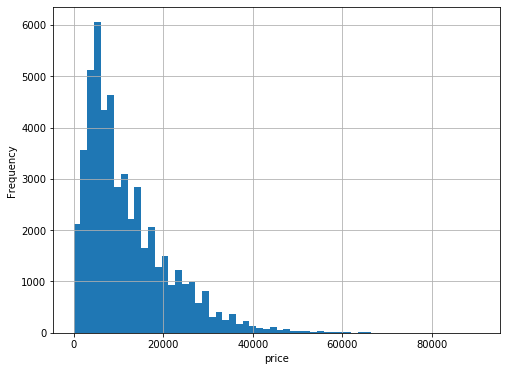

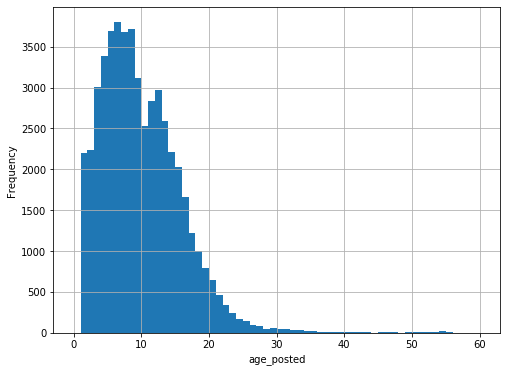

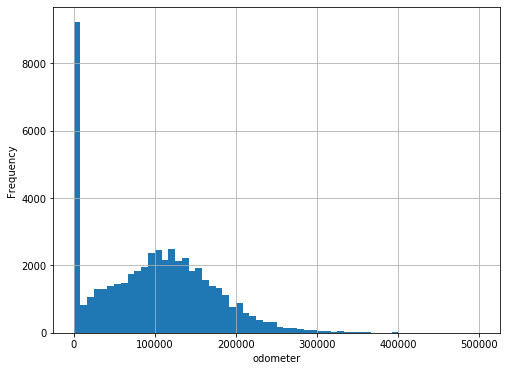

In [19]:
for column in ['price', 'age_posted', 'odometer']:
    plt.figure(figsize=(8, 6))
    plt.xlabel(column)
    plt.ylabel('Frequency')
    df2[column].hist(bins=60)
    plt.show()

The price and age distributions seems reasonable, but the mileage have a peculiar peak near zero. The leftmost bar represent almost 20% of the entire dataset, and it seems unlikely when new cars make up such a small portion of all ads (see `condition` histogram above). Let's have a look at the numbers.

In [20]:
print(len(df2.query('odometer == 0')))
print(len(df2.query('odometer < 10')))
print(len(df2.query('odometer < 100')))
print(len(df2.query('odometer < 1000')))

184
8046
8241
8709


So the abnormality is restricted to single digits. We will still keep these rows in the dataset, assuming all other values are OK, but we need to keep this issue in mind.

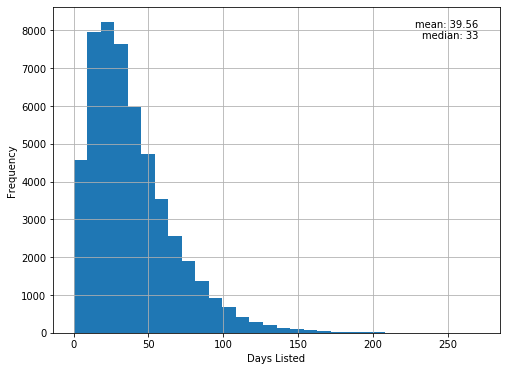

In [21]:
plt.figure(figsize=(8,6))
plt.xlabel('Days Listed')
plt.ylabel('Frequency')
df2['days_listed'].hist(bins=30)
plt.text(270, 8300, 
         f"mean: {df2['days_listed'].mean():.2f}\nmedian: {df2['days_listed'].median():.0f}", 
         ha='right', va='top'
        )
plt.show()

The typical lifetime of an ad is 10-40 days. Let's figure out what affects the lifetime of an ad.

### Correlations

In [22]:
df2.corr()['days_listed'].sort_values()

month_posted     -0.011762
model_year       -0.004501
condition        -0.002493
price            -0.000893
price_group      -0.000648
mean_mileage      0.000970
is_4wd            0.002065
weekday_posted    0.002754
cylinders         0.003810
age_posted        0.005346
odometer          0.007956
year_posted       0.011338
days_listed       1.000000
Name: days_listed, dtype: float64

None of the numeric data we have is significantly correlated to the lifetime of an ad. What about categorical data?

In [23]:
for column in ['model', 'fuel', 'transmission', 'type', 'paint_color', 'is_4wd']:
    print(df2
          .pivot_table(values='days_listed', 
                       index=column, 
                       aggfunc=['count', 'mean', 'median'],
                      )
          .sort_values(('mean', 'days_listed')))
    print()

                         count        mean      median
                   days_listed days_listed days_listed
model                                                 
ford f250                  336   35.875000        29.5
dodge dakota               242   36.334711        34.0
honda pilot                302   37.109272        30.0
hyundai elantra            422   37.336493        32.0
volkswagen passat          349   37.429799        31.0
...                        ...         ...         ...
ford taurus                302   42.215232        36.0
bmw x5                     267   42.419476        34.0
gmc acadia                 315   42.441270        34.0
chevrolet suburban         557   42.615799        36.0
kia sorento                235   43.302128        34.0

[100 rows x 3 columns]

               count        mean      median
         days_listed days_listed days_listed
fuel                                        
hybrid           409   38.266504        32.0
other            107   38

`model` seems to have a wide range of mean and median `days_listed`. electrics and busses are unusual, but too few to have an impact. 

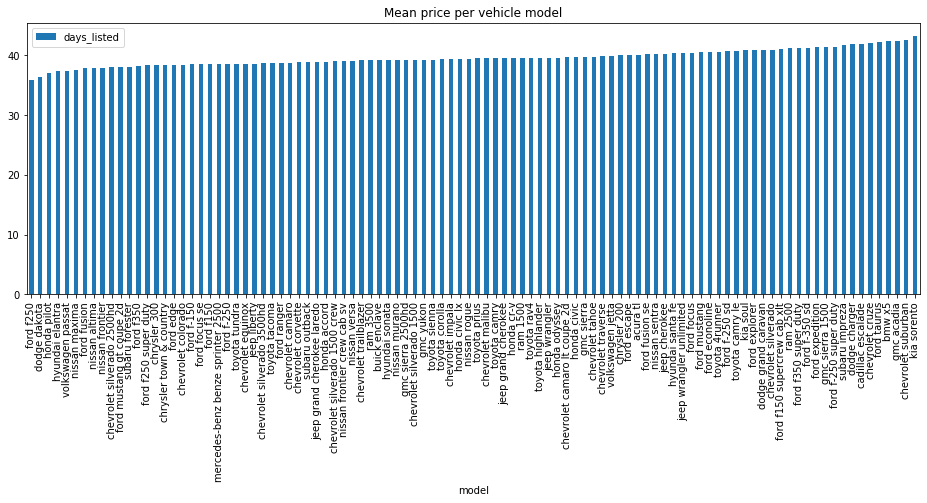

In [24]:
(df2
 .pivot_table(values='days_listed', 
              index='model', 
              aggfunc='mean',
             )
 .sort_values('days_listed')
 .plot(kind='bar', figsize=(16, 5))
)
plt.title('Mean price per vehicle model')
plt.show()

There are too many different models to work with. We need to group similar models togather. Luckily, we already have a variable for that - `type`.

### Analysis by vehicle type

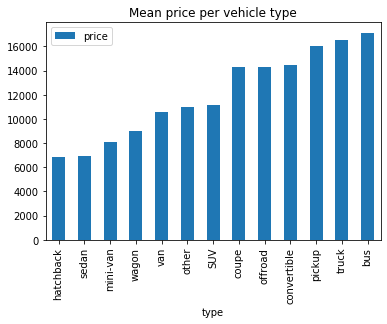

In [25]:
df2.pivot_table(values='price', index='type').sort_values('price').plot(kind='bar')
plt.title('Mean price per vehicle type')
plt.show()

We see some correlation between price and size. Now, which types are the most common?

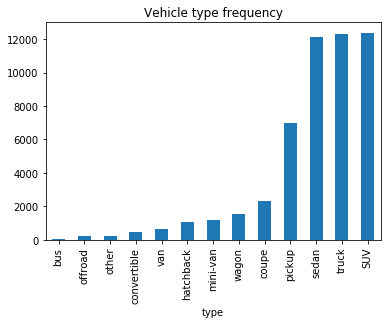

In [26]:
df2.pivot_table(values='price', index='type', aggfunc='count').sort_values('price').plot(kind='bar', legend=False)
plt.title('Vehicle type frequency')
plt.show()

So three vehicle types make up almost a quarter of the data each. We will focus on the two most common: SUVs and trucks.

#### SUV

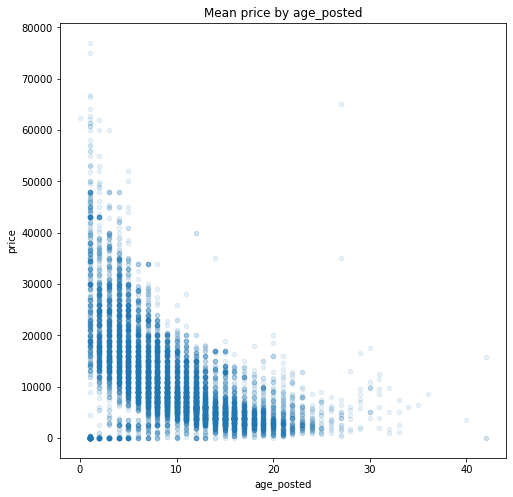

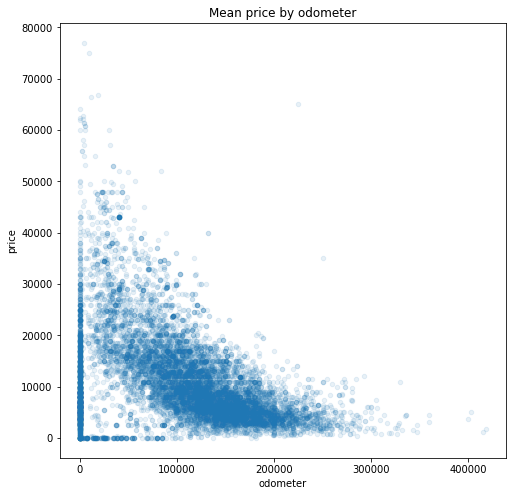

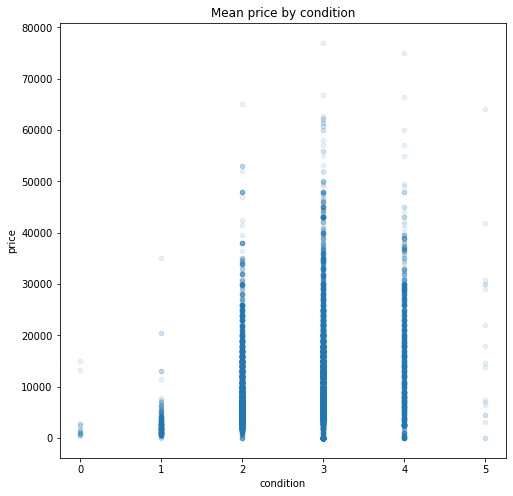

In [27]:
for column in ['age_posted', 'odometer', 'condition']:
    df2.query('type == "SUV"').plot(y='price', x=column, kind='scatter', alpha=0.1, figsize=(8, 8))
    plt.title(f'Mean price by {column}')
    plt.show()

Price is negatively correlated to age and mileage. Artefacts are seen at zero mileage, and to a lesser extent, at zero price. The raletion between price and condition is not as obvious from the charts. About half of all cars are described by the seller as in 'excellent' condition (3), so this is where we see most data points. 

In [28]:
df2.query('type == "SUV"')['paint_color'].value_counts()

unknown    2233
black      2213
white      1958
silver     1556
grey       1180
blue       1055
red         906
green       436
brown       367
custom      307
orange       84
yellow       48
purple       39
Name: paint_color, dtype: int64

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


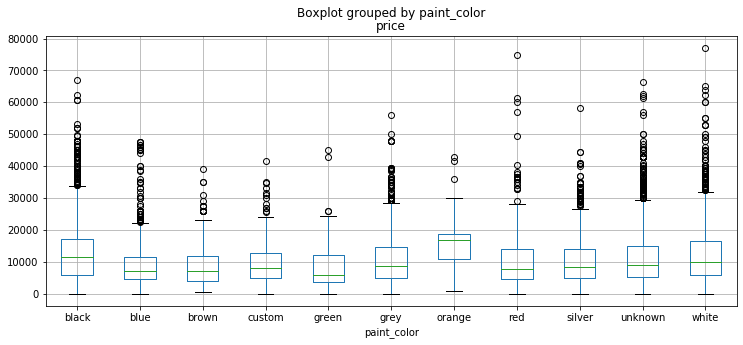

In [29]:
df2.query("type == 'SUV' and ~paint_color.isin(['yellow', 'purple'])").boxplot('price', by='paint_color', figsize=(12, 5))
plt.show()

People with orange SUVs are asking more for their used car, with a median greater than 15K. Meanwhile, green SUVs median is just slightly above 5K.

In [30]:
df2.query('type == "SUV"')['transmission'].value_counts()

automatic    11714
manual         508
other          160
Name: transmission, dtype: int64

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


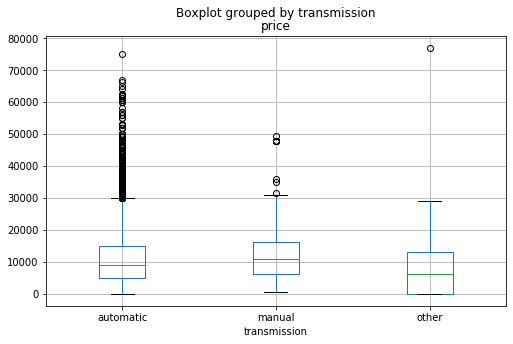

In [31]:
df2.query('type == "SUV"').boxplot('price', by='transmission', figsize=(8, 5))
plt.show()

Not a big difference between manual and automatic, but at least a quarter of other transsmission types are simply given out for free.

#### Truck

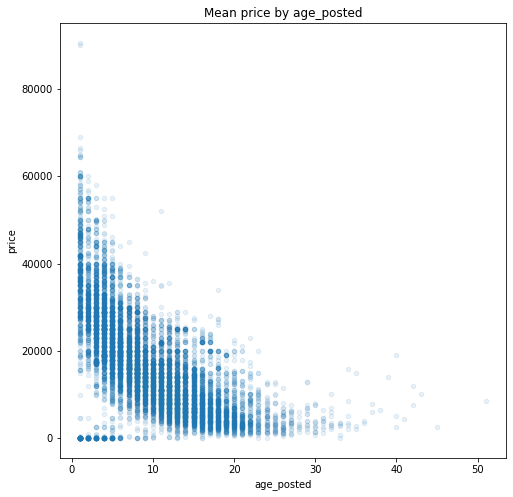

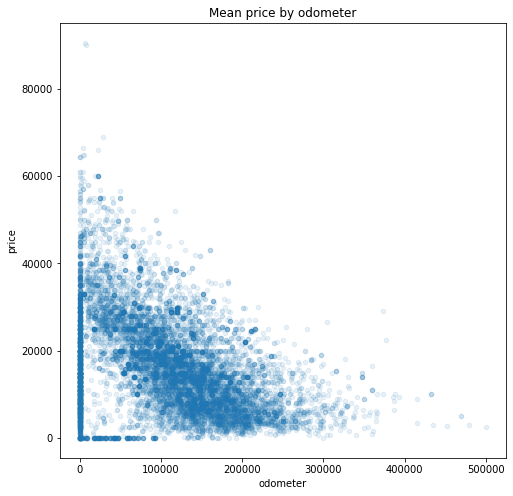

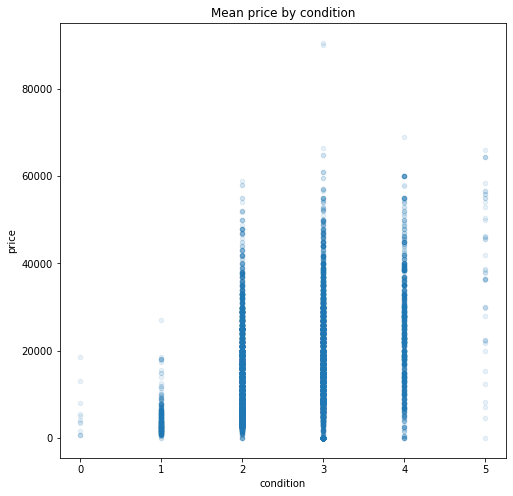

In [32]:
for column in ['age_posted', 'odometer', 'condition']:
    df2.query('type == "truck"').plot(y='price', x=column, kind='scatter', alpha=0.1, figsize=(8, 8))
    plt.title(f'Mean price by {column}')
    plt.show()

Price is negatively correlated to age and mileage. Artefacts are seen at zero mileage, and to a lesser extent, at zero price. The raletion between price and condition is not as obvious from the charts. About half of all cars are described by the seller as in 'excellent' condition (3), so this is where we see most data points. 

In [33]:
df2.query('type == "truck"')['paint_color'].value_counts()

white      3728
unknown    2129
black      1572
red        1059
silver     1014
grey        956
blue        877
custom      315
green       276
brown       253
yellow       67
orange       48
purple       16
Name: paint_color, dtype: int64

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


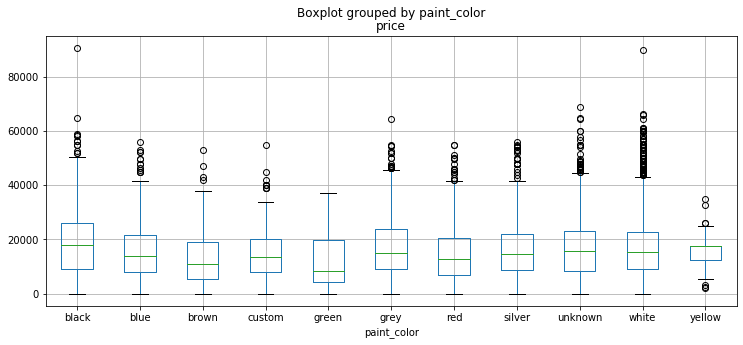

In [34]:
df2.query("type == 'truck' and ~paint_color.isin(['orange', 'purple'])").boxplot('price', by='paint_color', figsize=(12, 5))
plt.show()

People with black trucks are asking more for their used car, with a median at almost 20K. Once again, the green painted go for the cheapest with median below 10K.

In [35]:
df2.query('type == "truck"')['transmission'].value_counts()

automatic    11663
manual         441
other          206
Name: transmission, dtype: int64

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


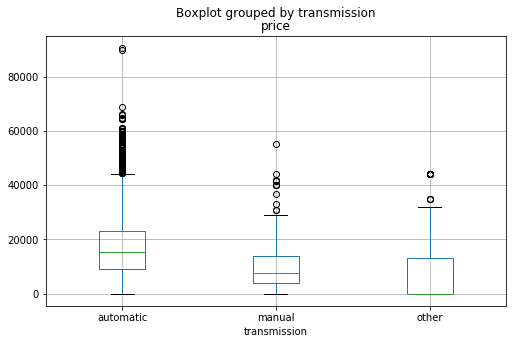

In [36]:
df2.query('type == "truck"').boxplot('price', by='transmission', figsize=(8, 5))
plt.show()

Unlike SUVs, with trucks automatic go for higher than manual. At least a half of other transsmission types are just given out for free.

## Overall conclusion

- We have analysed data of car sale ads on Crankshaft List, in order to find what factors affect the asking price.
- Some values were missing. These were filled in based on existing values, and where that didn't work the ad was removed from the dataset. Only a negligible number of ads were removed from the dataset this way.
- Some columns had their data type changed.
- High outliers in price, age and mileage, accounting for less than 0.1%, were removed from the dataset.
- There are low outliers in mileage, but they were not removed, because they make up a significant portion of the dataset. 
- We found that price depends mostly on vehicle models, which can be grouped into vehcle types.
- Larger vehicles tend to have higher asking prices.
- SUVs and truck are the most common vehicle types, making up nearly half of the dataset.
- Prices for both SUVs and trucks are negatively correlated to age and mileage.
- Orange SUVs have the highest median price of any color.
- Black trucks have the highest median price of any color.
- In both SUVs and trucks, the lowest median asking price by color is for green.
- There is little difference in price between manual and automatic SUVs.
- Automatic trucks tend to have a higher prices than manual.
- In both SUVs and trucks, other transmission types tend to have a lower asking price, and in a significant portion of the ads are just free.